# TP N°1 : Perceptron mono-couche
Travail fait par : Yasmine Gharbi et Arij Habbechi RT4/1

Objectif :
Ce TP a pour objectif d’introduire les bases de la théorie des réseaux de neurones et d’introduire
le cas particulier du perceptron. Nous allons examiner l'algorithme Perceptron, qui est le réseau
de neurones à une seule couche le plus élémentaire utilisé pour la classification binaire.

# I. Travail à faire :

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

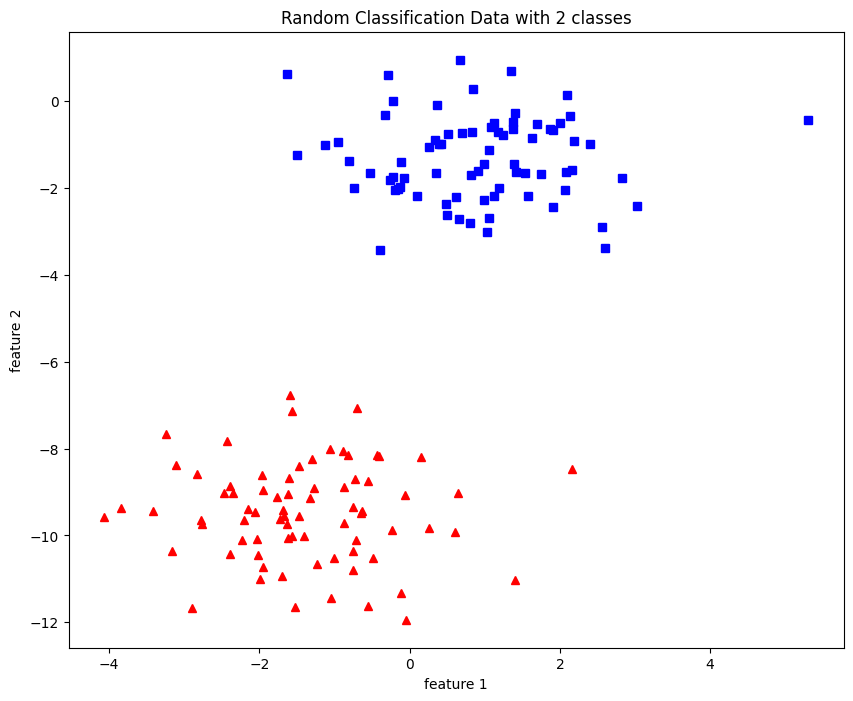

In [ ]:
from sklearn import datasets
from matplotlib import pyplot as plt

X, y = datasets.make_blobs (n_samples=150, n_features=2, centers=2, cluster_std=1.05,random_state=2)

#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

## Implémentation :

In [ ]:
# Heaviside activation function :
def acti_func(z):
  if (z > 0):
    return 1
  return 0


In [ ]:
# Implementer l’algorithme de perceptron
import numpy as np

def perceptron(X, y, lr, epochs):
  # X --> Inputs.
  # y --> labels/target.
  # lr --> learning rate.
  # epochs --> Number of iterations.
  # m-> number of training examples
  # n-> number of features
  m, n = X.shape
  # Initializing parameters(theta) to zeros.
  # +1 in n+1 for the bias term.
  w = np.zeros((n+1,1))
  # Empty list to store how many examples were
  # misclassified at every iteration.
  n_miss_list = []
  # Training.
  for epoch in range(epochs):
    # variable to store #misclassified.
    n_miss = 0
    # looping for every example.
    for idx, x_i in enumerate(X):
      # Insering 1 for bias, X0 = 1.
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      # Calculating prediction/hypothesis.
      y_hat = acti_func(np.dot(x_i.T, w))
      # Updating if the example is misclassified.
      if (np.squeeze(y_hat) - y[idx]) != 0:
        w+=lr*(y[idx]-y_hat)*x_i
        # Incrementing by 1.
        n_miss+=1
    # Appending number of misclassified examples
    # at every iteration.
    n_miss_list.append(n_miss)
  return w, n_miss_list

In [ ]:
w, _= perceptron(X, y, 0.001, 10)

In [ ]:
w

array([[0.01      ],
       [0.0014886 ],
       [0.00169384]])

In [ ]:
perceptron(X, y, 0.0000000001, 2)

(array([[1.00000000e-09],
        [1.48859540e-10],
        [1.69384333e-10]]),
 [14, 0])

In [ ]:
# Tracez la limite de décision trouvée par votre algorithme.
def plot_decision_boundary(X, w):
  # X --> Inputs
  # w --> parameters
  # The Line is y=mx+c
  # So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
  # Solving we find m and c
  x1 = [min(X[:,0]), max(X[:,0])]
  m = - w[1]/w[2]
  c = - w[0]/w[2]
  x2 = m*x1 + c
  # Plotting
  plt.plot(x1,x2,'g',label='decision boundary')

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

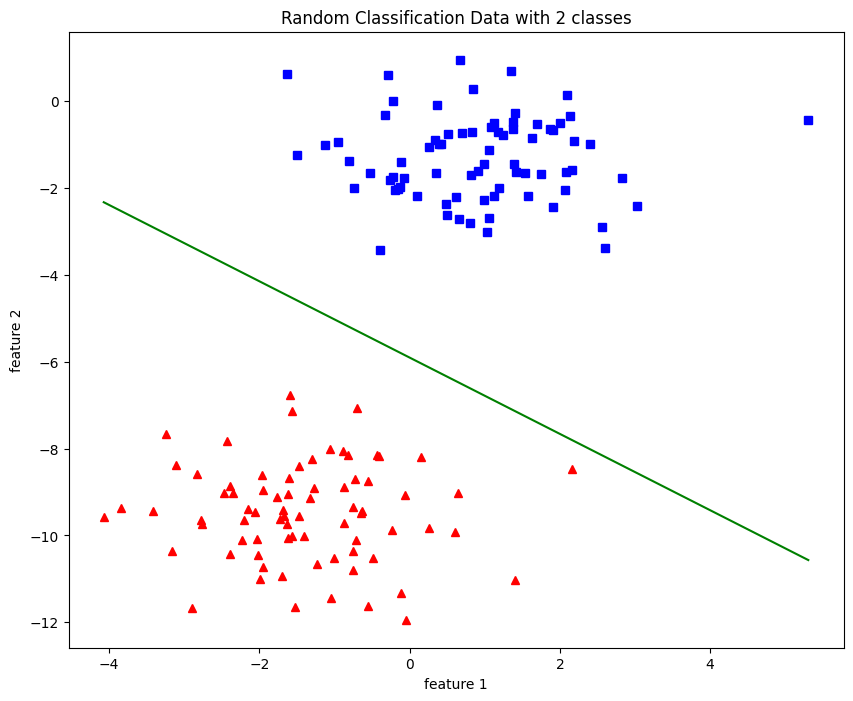

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(X,w)
plt.title('Random Classification Data with 2 classes')

# Exercice2

Considérons le data set S = {(x, y)}_{i=1}^{250} composé de 250 points 𝑥𝑖 = (𝑥1, 𝑥2) et leur classes y𝑖.
Les premières 125 x_i sont classées y𝑖 = 1 et sont générées selon une distribution gaussienne 𝑥𝑖∼𝑁(𝜇1,σ^2_1), où 𝜇1=[-1,0]

Les dernières 125 x_i sont classées y𝑖 = 0 et sont générées selon une distribution gaussienne 𝑥𝑖∼𝑁(𝜇2,σ^2_2), où 𝜇2=[1,0]

Après avoir mélangé le dataset, on va le diviser en train et test sets, contenant 80 % et 20 % du dataset (en utilisant des méthodes de shuffling et de splitting existantes).


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

def generate_dataset(nbrClass1, nbrClass2, mu1, mu2, sigma1, sigma2, train_size=0.8, random_state=42):
    # Génération des points pour la classe 1
    class1_points = np.random.normal(mu1, sigma1, (nbrClass1,2))

    # Génération des points pour la classe 0
    class2_points = np.random.normal(mu2, sigma2, (nbrClass2,2))

    # Création des étiquettes de classe
    class1_labels = np.full(nbrClass1, 1)
    class2_labels = np.full(nbrClass2, 0)

    # Concaténation des points et des étiquettes
    X = np.concatenate((class1_points, class2_points), axis=0)
    y = np.concatenate((class1_labels, class2_labels))

    # Mélange des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

## Implementation de code de perceptron :
Initializing the weights to zero in a multilayer perceptron (MLP) can lead to issues such as symmetry breaking, vanishing gradients, and identical neuron behavior. To overcome these problems, it's essential to initialize the weights randomly using techniques like Xavier (Glorot) initialization or He initialization. These methods help break symmetry and ensure effective gradient flow during training.

In [ ]:
# Implementer l’algorithme de perceptron
import numpy as np

def perceptron(X, y, lr, epochs):
  # X --> Inputs.
  # y --> labels/target.
  # lr --> learning rate.
  # epochs --> Number of iterations.
  # m-> number of training examples
  # n-> number of features
  m, n = X.shape
  # Initializing parameters(theta) to zeros.
  # +1 in n+1 for the bias term.
  w = np.random.rand(n + 1, 1)* 1e-2 # multiplie by 0.01 to make the initial weights small
  # Empty list to store how many examples were
  # misclassified at every iteration.
  n_miss_list = []
  # Training.
  for epoch in range(epochs):
    # variable to store #misclassified.
    n_miss = 0
    # looping for every example.
    for idx, x_i in enumerate(X):
      # Insering 1 for bias, X0 = 1.
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      # Calculating prediction/hypothesis.
      y_hat = acti_func(np.dot(x_i.T, w))
      # Updating if the example is misclassified.
      if (np.squeeze(y_hat) - y[idx]) != 0:
        w+=lr*(y[idx]-y_hat)*x_i
        # Incrementing by 1.
        n_miss+=1
    # Appending number of misclassified examples
    # at every iteration.
    n_miss_list.append(n_miss)
  return w, n_miss_list

In [ ]:
# dataset
# Paramètres
n_points = 250
nbrClass1 =125
nbrClass2 =125
mu1 = np.array([-1, 0])
mu2 = np.array([1, 0])

## Predict function to calculate accuracy later :

In [ ]:
def predict(X,w):
    m, n = X.shape
    predicted_labels =[]
    for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            predicted_labels.append(y_hat)
    return predicted_labels

## Experience 1 : σ_1^2 = σ_2^2 = 0.25

In [ ]:

X_train, X_test, y_train, y_test = generate_dataset(nbrClass1, nbrClass2, mu1, mu2, 0.25, 0.25)


In [ ]:
# learning rate and number of epochs
lr = 0.01
epochs = 100

# perceptron function with training data
w_exp1, _ = perceptron(X_train, y_train, lr, epochs)

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

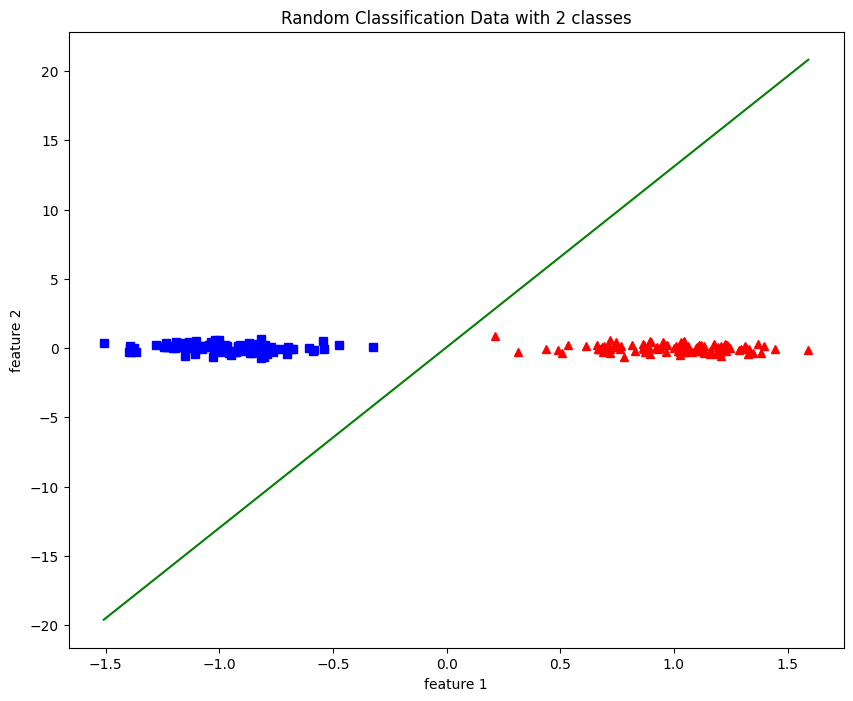

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X_train[:, 0][ y_train == 0], X_train[:, 1][ y_train == 0], 'r^')
plt.plot(X_train[:, 0][ y_train == 1], X_train[:, 1][ y_train == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(X_train,w_exp1)
plt.title('Random Classification Data with 2 classes')



- l'algorithme converge il sépare les deux clusters grace au sigma petite=0.25 qui génére une bonne dataset

- la limite de décision tracee n'est pas unique. Elle dépend de l'initialisation des weights, nombre d'epochs et learning rate

La justesse (accuracy) de la classification sur l'ensemble de test :

In [ ]:
from sklearn.metrics import accuracy_score
exp1_predicted = predict(X_test, w_exp1)
score = accuracy_score(exp1_predicted, y_test)
print(f'accuracy =  {int(score*100)} %')

accuracy =  100 %


Text(0.5, 1.0, 'Decision boundary of 2 classes: Test Data')

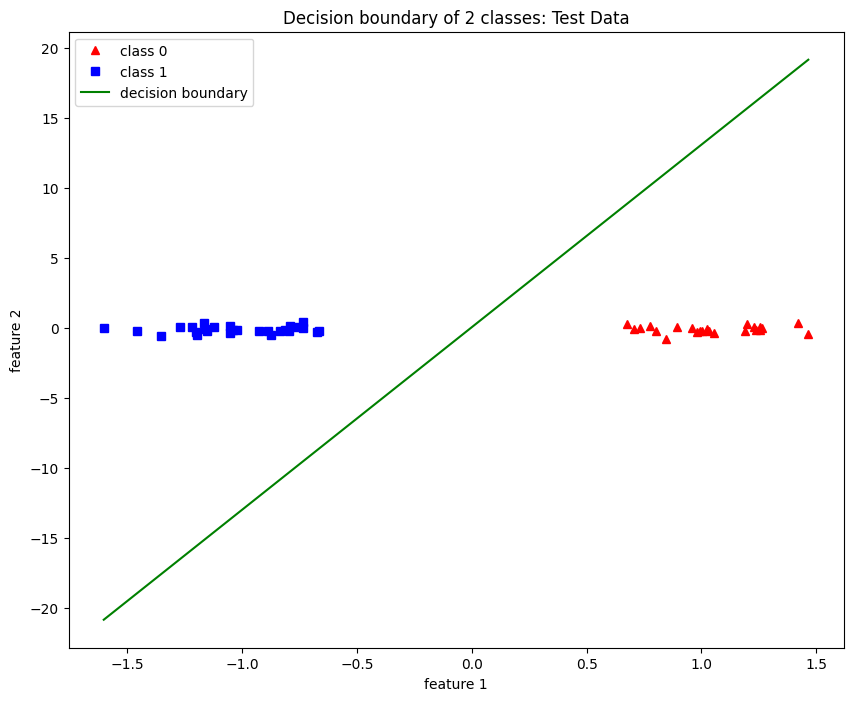

In [ ]:
#tracer la limite de décision sur l'ensemble de test
fig = plt.figure(figsize=(10,8))
plt.plot(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], 'r^',label='class 0')
plt.plot(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], 'bs',label='class 1')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(X_test,w_exp1)
plt.legend()
plt.title('Decision boundary of 2 classes: Test Data')

## Experience 2 : σ_1^2 = σ_2^2 = 0.75

In [ ]:
X_train, X_test, y_train, y_test = generate_dataset(nbrClass1, nbrClass2, mu1, mu2, 0.75, 0.75)

In [ ]:
# learning rate and number of epochs
lr = 0.01
epochs = 100

# perceptron function with training data
w_exp2, _ = perceptron(X_train, y_train, lr, epochs)

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

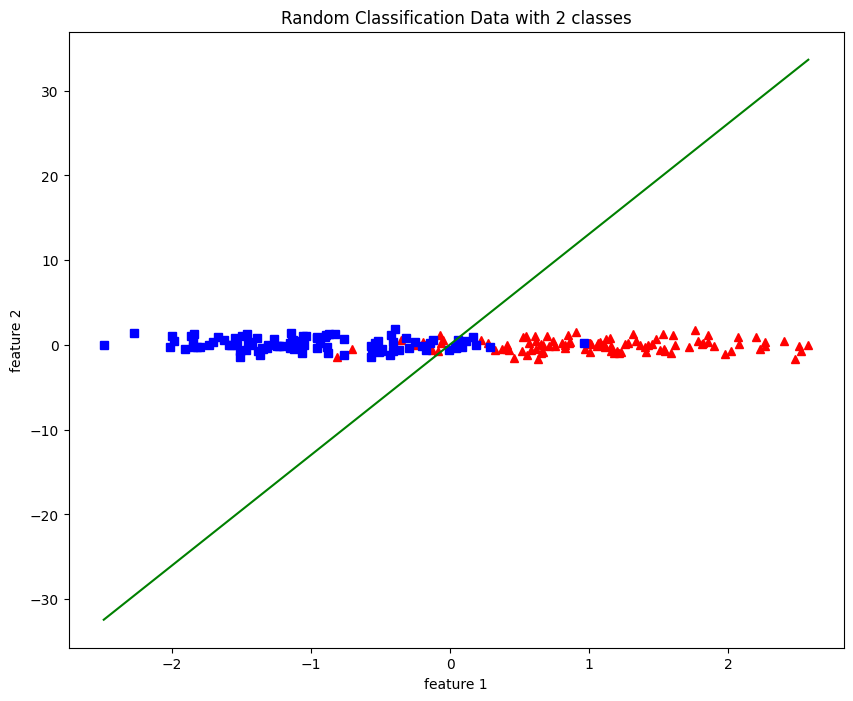

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X_train[:, 0][ y_train == 0], X_train[:, 1][ y_train == 0], 'r^')
plt.plot(X_train[:, 0][ y_train == 1], X_train[:, 1][ y_train == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(X_train,w_exp1)
plt.title('Random Classification Data with 2 classes')



- l'algorithme ne converge pas car il n'arrive pas a sépare les deux clusters a cause de sigma grande =0.75 qui génére une dataset plus eclatee dans l'espace

- la limite de décision tracee n'est pas unique. Elle dépend de l'initialisation des weights, nombre d'epochs et learning rate

La justesse (accuracy) de la classification sur l'ensemble de test :

In [ ]:
from sklearn.metrics import accuracy_score
exp2_predicted = predict(X_test, w_exp2)
score = accuracy_score(exp2_predicted, y_test)
print(f'accuracy =  {int(score*100)} %')

accuracy =  92 %


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

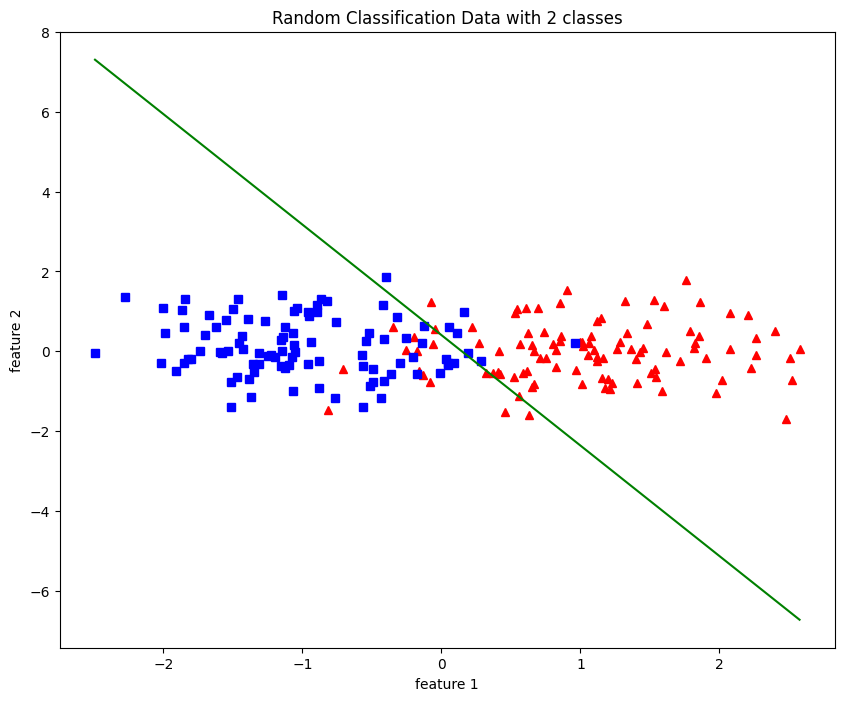

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X_train[:, 0][ y_train == 0], X_train[:, 1][ y_train == 0], 'r^')
plt.plot(X_train[:, 0][ y_train == 1], X_train[:, 1][ y_train == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(X_train,w_exp2)
plt.title('Random Classification Data with 2 classes')

## Experience 3 :
Afin d'étudier l'impact de la variation de σ2
1
et σ2
2
sur les performances du système, nous
stockons l'erreur sur plusieurs expériences (prendre nb expérience = 30). Puis on calcule la
moyenne et la variance des erreurs stockées. Pour chaque σ1
2
et σ2
2 ∈ [0.01, 0.1, 0.5, 0.7] calculez la moyenne et la variance puis tracez les résultats en utilisant
matplotlib.pyplot.errorbar.

In [ ]:
def eval_perceptron(nbr_exp, sigma1, sigma2):

  test_errors=[]
  for i in range(nbr_exp):

    X_train, X_test, y_train, y_test = generate_dataset(nbrClass1, nbrClass2, mu1, mu2, sigma1, sigma2)
    w,_=perceptron(X_train,y_train,0.01,100)
    predicted = predict(X_test, w)
    test_errors.append(1-accuracy_score(predicted, y_test))

  mean_error = np.mean(test_errors)
  std_error = np.std(test_errors)

  return mean_error,std_error


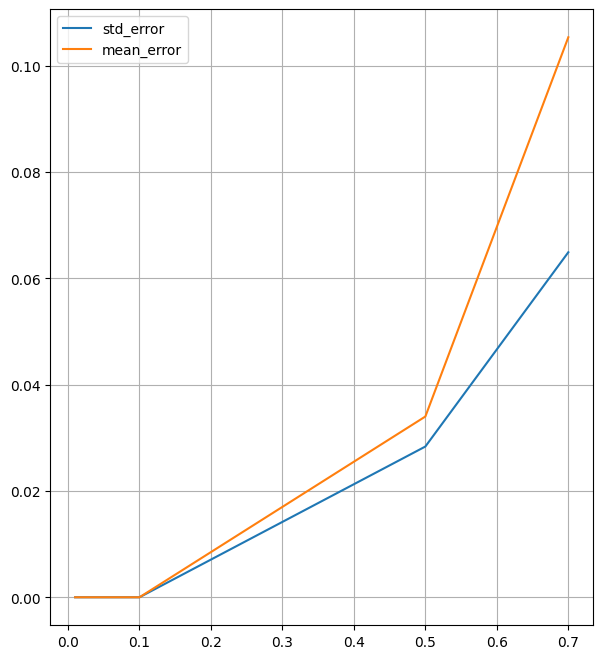

In [ ]:
mean_errors=[]
std_errors=[]

fig = plt.figure(figsize=(7,8))
for sigma in [0.01, 0.1, 0.5, 0.7]:
  mean_err,std_err=eval_perceptron(30,sigma,sigma)
  mean_errors.append(mean_err)
  std_errors.append(std_err)


plt.grid()
plt.errorbar([0.01, 0.1, 0.5, 0.7], std_errors,label='std_error')
plt.errorbar([0.01, 0.1, 0.5, 0.7], mean_errors,label='mean_error')
plt.legend()

##Commenter le résultat:
Ce graphique montre que sigma a un effet énorme sur la précision de la classification.
En effet, lorsque sigma augmente, l'erreur de vitesse variable augmente, ce qui peut être attribué au fait qu'une valeur élevée de std entraîne une grande dispersion des points de données au sein de chaque cluster, conduisant à leur chevauchement.

**Conclusion générale**

Au cours de ce TP, nous avons examiné l'impact des variances de distribution des données sur les performances de l'algorithme du perceptron. Nos expériences ont clairement démontré que l'écart type  des distributions de données joue un rôle crucial dans la précision de classification du perceptron.

Principales conclusions :

À mesure que sigma augmente, l'erreur de classification augmente également, un phénomène qui peut être directement lié à la dispersion accrue des points de données au sein de chaque classe. Des valeurs plus élevées de sigma entraînent un chevauchement plus important entre les classes, compliquant la tâche d'un classificateur linéaire comme le perceptron.


Le perceptron fonctionne de manière optimale lorsque les classes sont distinctes et bien séparées, ce qui se produit à des valeurs de sigma plus basses. En revanche, à des valeurs de sigma plus élevées où les points de données sont plus dispersés et se chevauchent davantage, la capacité du perceptron à classer précisément les données diminue significativement.


Ces résultats mettent en lumière la sensibilité des modèles linéaires simples à la distribution sous-jacente des données. Pour les applications où les classes de données sont intrinsèquement proches ou se chevauchent, des modèles alternatifs capables de capturer des relations non linéaires peuvent être plus appropriés.